# Schokoriegel

Sie arbeiten für einen Schokoladenhersteller und haben einen neuen Schokoriegel entwickelt.
Um zu entscheiden was der ideale Verkaufspreis ist, setzen Sie ein Experiment auf. In sechs Läden bieten
Sie das Produkt zu unterschiedlichen Preisen für eine Dauer von 2 Wochen an. Sie zählen jeweils die Anzahl der 
verkauften Riegel:



| Laden |Preis (Euro)|Verkaufte Riegel|
| ------|------------|----------------|
|   1   |     20     |       2        |
|   2   |     16     |       4        |
|   3   |     15     |       4        |  
|   4   |     14     |       7        | 
|   5   |     13     |       8        |
|   6   |     10     |       10       |

a) Zeichnen sie den passenden Scatterplot der Daten
   + händisch
   + matplotlib

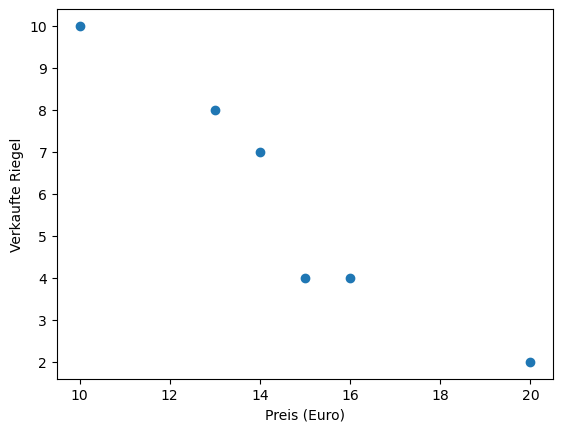

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

X=np.array([[20, 2], [16,4], [15,4], [14,7],[13,8],[10,10]])
plt.xlabel('Preis (Euro)')
plt.ylabel('Verkaufte Riegel')
plt.scatter(X[:,0], X[:,1])

b) Bestimmen Sie die Regressionsgerade und berechnen sie diese Mittel Ordinary Least Square

Regressionsgerade: 18.37951807228916 -0.855421686746988x


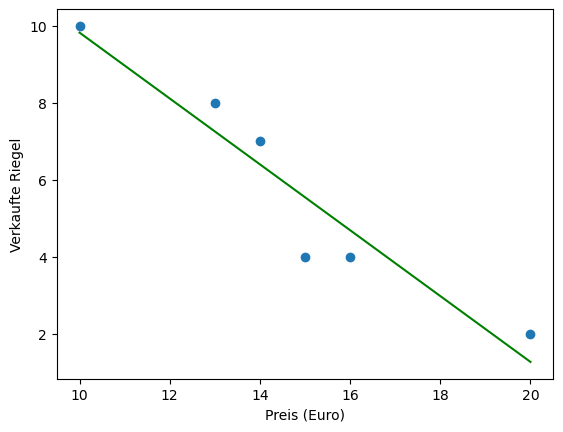

In [6]:
Ys = X[:, 1]
Xs = X[:, 0]

mean_y = np.mean(Ys)
mean_x = np.mean(Xs)

div1 = 0
div2 = 0
for i in range(len(Ys)):
    div1 = div1+((Ys[i]-mean_y)*(Xs[i]-mean_x))
for x in Xs:
    div2 = div2 + (x-mean_x)**2

w1 = div1/div2


w0=mean_y - w1*mean_x
print("Regressionsgerade: " + str(w0) + " " + str(w1) + "x")

def regressionLine(x):
    return w0 + w1*x

line = np.empty([0])
for x in Xs:
    line = np.append(line, regressionLine(x))

X=np.array([[20, 2], [16,4], [15,4], [14,7],[13,8],[10,10]])
plt.xlabel('Preis (Euro)')
plt.ylabel('Verkaufte Riegel')
plt.scatter(X[:,0], X[:,1])

plt.plot(Xs, line, color='green')

# Implementierung der Linearen Regression

Schreiben Sie eine Klasse MyLinReg, die eine Lineare Regression mit einem abhängigen Parameter erlauben soll.
Eine Funktion fit() soll die Regressionsparamter mittels Gradientenabstieg bestimmen


Testen Sie ihr System mit einem Merkmal des Diabetes-Datensets. Train=Test sind für diese Aufgabe ok.




In [7]:
class MyLinReg:
    
    def __init__(self, epochs):
        self.w0 = random.random()
        self.w1 = random.random()
        self.e = epochs
    
    def fit(self, X, Y):
        lr = 1/(Y[0]-self.predict(X[0]))
        for i in range(self.e):
            yPred = np.empty([0])
            for x in X:
                yPred= np.append(yPred, self.predict(x))
            diffY = Y - yPred
            deltaW1 = (-1/len(X))*np.sum(X*diffY)
            deltaW0 = (-1/len(X))*np.sum(diffY)
            self.w1 = self.w1-lr*deltaW1
            self.w0 = self.w0 - lr*deltaW0
            
    def predict(self, x):
        return self.w0 + self.w1*x
        

test = MyLinReg(3)

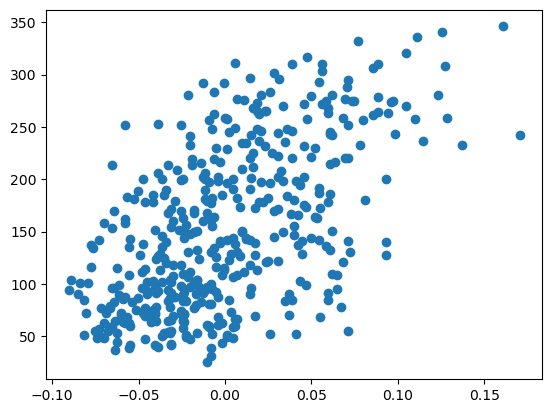

In [8]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X = diabetes.data[:, np.newaxis, 2]
Y = diabetes.target

plt.scatter(X,Y)
test.fit(X, Y)
yPred = np.empty([0])
for x in X:
    yPred = np.append(yPred, test.predict(x))


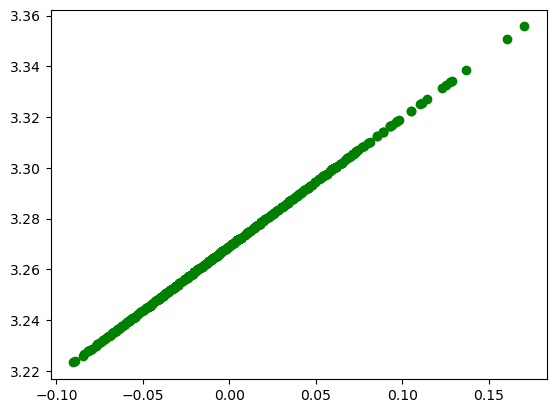

In [9]:
plt.scatter(X, yPred, color='green')

# Regressionsbeispiel

Verwenden Sie den California housing Corpus oder den Boston Corpus aus sklearn und führen sie mittels 
Methoden aus sklearn eine lineare regression durch.

Verwenden Sie dabei das Konzept der LOO-Evaluation für Regression, das in der Vorlesung besprochen wurde.


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from scipy.stats import pearsonr

chCorpus =fetch_california_housing()

loo = LeaveOneOut()
lr = LinearRegression()

X = chCorpus['data']
y = chCorpus['target']
scores=[]
for train_indices, test_indices in loo.split(X,y):
    #print("Train: ", train_indices, "Test: ", test_indices)
    lr.fit(X[train_indices], y[train_indices])
    pred=lr.predict(X[test_indices])
    scores.append(pred)
print("Done")
r=pearsonr(y,np.asarray(scores).flatten())[0]
print('Pearson r = %.2f' %r)



Done
Pearson r = 0.78


# Eigenständige Implementierung der multiplen linearen Regression.

Schreiben Sie eine Klasse *MyLinRegMult* die die multiple lineare Regression implementiert.
Das Taining der Regression ist mittels Gradientenabstiegsverfahren zu implementieren.


In [10]:
class MyLinRegMult:
    
    def __init__(self, epochs):
        self.w0 = random.random()
        self.w1 = np.empty([0])
        self.e = epochs
    
    def fit(self, X, Y):
        for i in range(X.shape[1]):
            self.w1 = np.append(self.w1, random.random())
        lr = 1/(Y[0]-self.predict(X[0]))    
        for i in range(self.e):
            yPred=np.empty([0])
            for x in X:
                yPred = np.append(yPred, self.predict(x))
            diffY = Y-yPred
            deltaW1 = (-1/len(X))*np.sum(np.dot(diffY, X))
            deltaW0 = (-1/len(X))*np.sum(diffY)
            self.w1 = self.w1 - lr*deltaW1
            self.w0 = self.w0 - lr*deltaW0
    def predict(self, X):
        return self.w0 + np.dot(self.w1, X)

test = MyLinRegMult(30)

In [11]:
X = diabetes.data
Y = diabetes.target
print(X[0])
print(Y[0])
test.fit(X, Y)
yPred = np.empty([0])
for x in X:
    yPred = np.append(yPred, test.predict(x))
r=pearsonr(Y,np.asarray(yPred).flatten())[0]
print('Pearson r = %.2f' %r)
print(Y-yPred)

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0
Pearson r = 0.49
[123.20994102  48.00395593 113.26054658 178.59089293 107.57008561
  70.54750357 110.91058554  34.37316585  82.15111504 282.6131531
  74.70832279  41.42734314 151.68575666 157.16056725  90.55811652
 142.491899   137.96474016 115.60204062  69.91072936 140.818873
  41.0560739   21.83491014  40.83336864 216.24346209 156.8754684
 174.55224421 110.57928993  57.66391645 103.98007931 255.05201721
 101.66732153  32.28887466 312.85150962  59.78909259  38.32229388
  73.90333936 237.21579361 248.73053904 223.03389102  62.29283742
  71.51903721  28.61711045  33.74234699  64.42932729 230.92258218
  25.33721905 163.20014133 115.67441929  47.28488601 114.21001915
 127.66825689 197.26046286  31.37601131  76.15331007 154.41092628
 100.84004988  24.67370167  10.60228614 142.44299465 141.59349542
  34.3155068  116.4483248   24.64313749 100.8400513   43.6268593
 